Automatically created module for IPython interactive environment
Computing embedding
Done.
ward : 0.36s
average : 0.39s
complete : 0.34s


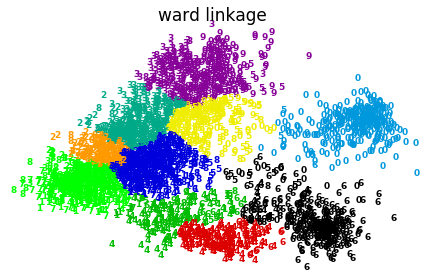

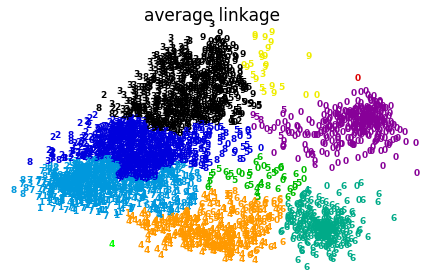

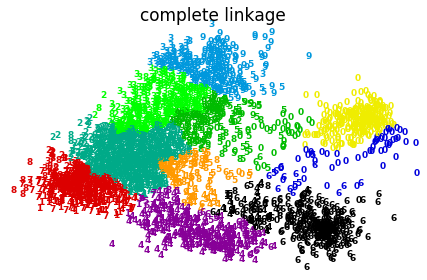

In [41]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [51]:
len(digits.target)

1797

In [99]:
import os
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn.cluster as cluster
import time
import seaborn as sns

plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

from skimage import io

from sklearn.cluster import AgglomerativeClustering

In [80]:
def obtain_data(filename):
    path_images = "/Users/CamiloCB/Downloads/MineriaDatos/Dogs/"

    path_class_1 = path_images + filename
    filenames_class_1 = os.listdir(path_class_1)
    
    train_class_1 = []
    for i in filenames_class_1:
        filename = os.path.join(path_class_1 + "/" + i)
        camera = io.imread(filename)
        train_class_1.append(camera)
    train_class_1 = np.asarray(train_class_1)
    train_class_1 = np.reshape(train_class_1,(len(train_class_1), train_class_1.shape[1]*train_class_1.shape[2]*train_class_1.shape[3]))
    return train_class_1

In [81]:
filenames_dogs = os.listdir("/Users/CamiloCB/Downloads/MineriaDatos/Dogs/")

In [118]:
index_class_0 = len(obtain_data(filenames_dogs[3]))
index_class_1 = len(obtain_data(filenames_dogs[4]))
index_class_2 = len(obtain_data(filenames_dogs[5]))

train_label = np.zeros(index_class_0+index_class_1+index_class_2)

train_label[:index_class_0] = 0
train_label[index_class_0: index_class_0 + index_class_1] = 1
train_label[index_class_0 + index_class_1: index_class_0 + index_class_1 + index_class_2] = 2

In [119]:
train_dogs = np.vstack((obtain_data(filenames_dogs[3]),obtain_data(filenames_dogs[4]),obtain_data(filenames_dogs[5])))

In [120]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(train_label[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()



0.41393442623
0.385245901639
0.409836065574


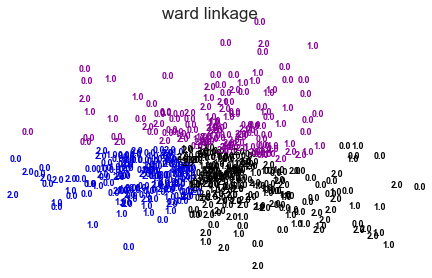

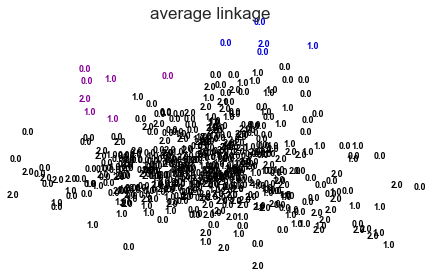

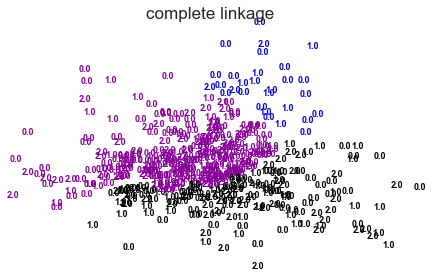

In [126]:

X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(train_dogs)

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = 0
    clustering.fit(X_red)
    #print("%s : %.2fs" % (linkage, 0 - t0))
    print (test_acc(clustering.labels_,train_label))
    plot_clustering(X_red, train_dogs, clustering.labels_, "%s linkage" % linkage)


plt.show()


In [122]:
from scipy.stats import mode
def test_acc(cat_pred, labels):
    real_pred = np.zeros_like(cat_pred)
    for cat in range(len(cat_pred)):
        idx = cat_pred == cat
        lab = labels[idx]
        if len(lab) == 0:
            continue
        real_pred[cat_pred == cat] = mode(lab).mode[0]
    return np.mean(real_pred == labels)

In [124]:
test_acc(clustering.labels_,train_label)

0.4098360655737705